## Churning in Telecommunication Industry

Churning has been a well-known issue within companies in the telecommunication industry. Many factors have contributed to this issue.

First and foremost, what is churning? According to [Investopedia](https://www.investopedia.com/terms/c/churnrate.asp), churning is defined as the rate at which customers <b><u>stop</u></b> doing business with an entity.

Some possible issue leading to churning:
- <b>Customer experience</b> -> customer may feel dissatisfied by customer service they receive.
- <b>Customer expectation</b> -> customer who trust in the company has a certain level of expectation.
- <b>Competitors</b> -> arising competitors might offer similar product with lower price.

As a result, churning will impact companies not only financially, but also reputation wise.

For companies, having the ability to predict consumer churning will help them forecast future revenue more accurately.

Through this arising issue, many have tried to figure out how to minimize churn rate and also predict which customer could potentially churn in the future based on customer information.

Keeping this issue in mind, I am inspired to create a machine learning model that can help understand user patterns that led to churn. 

I will try to identify churning rate factors for one of telecommunication company in United States. The dataset I'm going to use is provided by [Kaggle](https://www.kaggle.com/mnassrib/telecom-churn-datasets), which has features such as charges, customer's living area and number of calls they made throughout the month. 

By the end of this project, the <b>objective</b> hoped to be achieved are:
- Able to determine the most important factor impacting churn.
- Predict whether customer will churn in the future, given their monthly usage pattern.
- Give recommendation.

### Import package for cleaning and visualizing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Load Dataset (Training and Testing)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Combine test and train dataset

To visualize and analyze data, full training set (train + test) will be used. <br>
Goal: To gather better information and get more data sample

In [3]:
full = pd.concat([train,test],ignore_index=True)

### Column Description

- State: Customer's domicile state
- Account length: How long customer have been a member (in months)
- Area code: Customer's area code 
- International plan: Whether customer subscribe in internatinonal plan or not   
- Voice mail plan: Whether customer subscribe in voice mail plan
- Number vmail messages: How many voicemail message received per month
- Total day minutes: How many minutes customer make a call in day time (per month)
- Total day calls: How many times customer make a call in day time
- Total day charge: How much customer is charged in day time
- Total eve minutes: How many minutes customer make a call in evening
- Total eve calls: How many times customer make a call in evening
- Total eve charge: How much customer is charged in evening 
- Total night minutes: How many minutes customer make a call at night
- Total night calls: How many calls are made at night
- Total night charge: How much customer is charged at night
- Total intl minutes: How many minutes customer make an international call
- Total intl calls: How many times customer make an international call
- Total intl charge: How much customer is charged for international service
- Customer service calls: How many times customer make a call to customer service
- Churn: Target variable. 1 for churning customer, 0 for non churning

### Check null value

In [4]:
full.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
full.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

### Rename column

In [7]:
columns = ['State','Account_length','Area_code','Intl_plan','Voicemail_plan','Voicemail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','CS_calls','Churn']
train.columns = columns
test.columns = columns
full.columns = columns

### View head and tail of full dataset

In [8]:
full.head()

State  Account_length  Area_code Intl_plan Voicemail_plan  \
0    KS             128        415        No            Yes   
1    OH             107        415        No            Yes   
2    NJ             137        415        No             No   
3    OH              84        408       Yes             No   
4    OK              75        415       Yes             No   

   Voicemail_message  day_minute  day_call  day_charge  eve_minute  eve_call  \
0                 25       265.1       110       45.07       197.4        99   
1                 26       161.6       123       27.47       195.5       103   
2                  0       243.4       114       41.38       121.2       110   
3                  0       299.4        71       50.90        61.9        88   
4                  0       166.7       113       28.34       148.3       122   

   eve_charge  night_minute  night_call  night_charge  intl_minute  intl_call  \
0       16.78         244.7          91         11.01         10.0          3   
1       16.62         254.4         103         11.45         13.7          3   
2       10.30         162.6         104          7.32         12.2          5   
3        5.26         196.9          89          8.86          6.6          7   
4       12.61         186.9         121          8.41         10.1          3   

   intl_charge  CS_calls  Churn  
0         2.70         1  False  
1         3.70         1  False  
2         3.29         0  False  
3         1.78         2  False  
4         2.73         3  False

In [9]:
full.tail()

State  Account_length  Area_code Intl_plan Voicemail_plan  \
3328    WI             114        415        No            Yes   
3329    AL             106        408        No            Yes   
3330    VT              60        415        No             No   
3331    WV             159        415        No             No   
3332    CT             184        510       Yes             No   

      Voicemail_message  day_minute  day_call  day_charge  eve_minute  \
3328                 26       137.1        88       23.31       155.7   
3329                 29        83.6       131       14.21       203.9   
3330                  0       193.9       118       32.96        85.0   
3331                  0       169.8       114       28.87       197.7   
3332                  0       213.8       105       36.35       159.6   

      eve_call  eve_charge  night_minute  night_call  night_charge  \
3328       125       13.23         247.6          94         11.14   
3329       131       17.33         229.5          73         10.33   
3330       110        7.23         210.1         134          9.45   
3331       105       16.80         193.7          82          8.72   
3332        84       13.57         139.2         137          6.26   

      intl_minute  intl_call  intl_charge  CS_calls  Churn  
3328         11.5          7         3.11         2  False  
3329          8.1          3         2.19         1  False  
3330         13.2          8         3.56         3  False  
3331         11.6          4         3.13         1  False  
3332          5.0         10         1.35         2  False

### Rename target variable to numerical

In [10]:
train['Churn'] = train['Churn'].replace({False:0,True:1})
test['Churn'] = test['Churn'].replace({False:0,True:1})
full['Churn'] = full['Churn'].replace({False:0,True:1})

### View distribution of target variable

Goal: To see if the data is balanced (target 1 and target 0 has balance proportion)

In [11]:
churn = full['Churn'].value_counts()
churn

0    2850
1     483
Name: Churn, dtype: int64

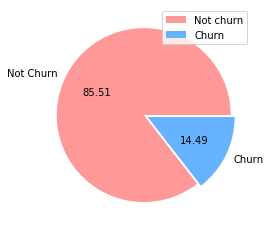

In [12]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ECFF33']
plt.pie(churn.values,labels=['Not Churn','Churn'],colors=colors,autopct='%.2f',explode=[0,0.05])
plt.legend(['Not churn','Churn'])
plt.show()

### Check categorical data

Check for any unusual input

In [13]:
full['Area_code'].value_counts()

415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [14]:
full['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
WA     66
NV     66
CO     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [15]:
full['Intl_plan'].value_counts()

No     3010
Yes     323
Name: Intl_plan, dtype: int64

In [16]:
full['Voicemail_plan'].value_counts()

No     2411
Yes     922
Name: Voicemail_plan, dtype: int64

### Data insight

### Split into categorical and numerical data

In [17]:
cat = ['State','Area_code','Intl_plan','Voicemail_plan']
num = [i for i in full.columns if i not in cat and i != 'Churn']

### Check outlier

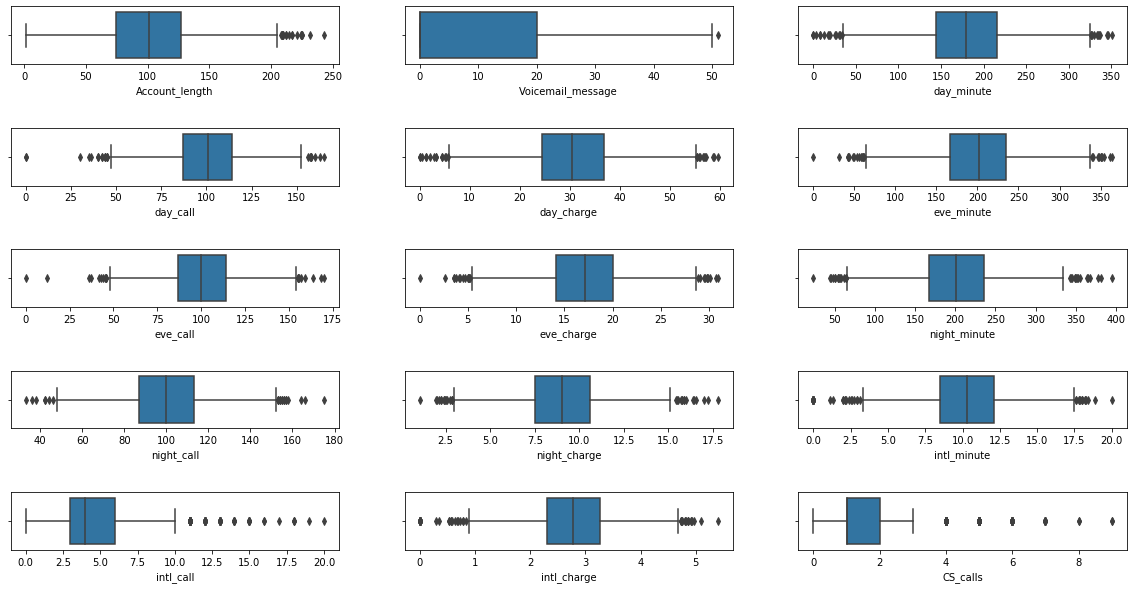

In [18]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.1)
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sb.boxplot(full[f'{num[i]}'])

### View categorical data patterns

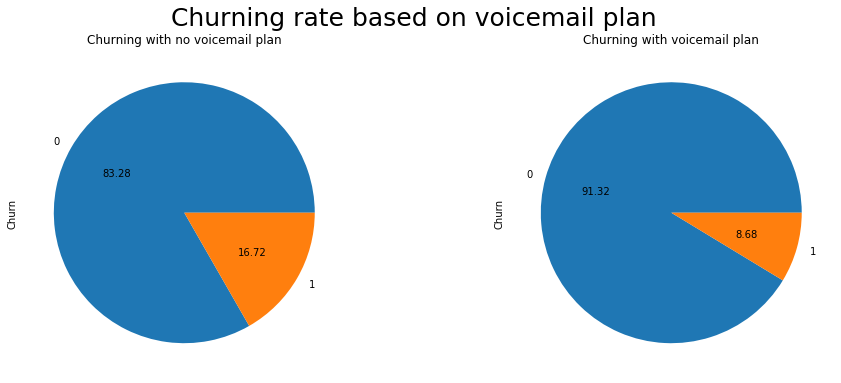

In [25]:
plt.figure(figsize=(16,6))
plt.suptitle('Churning rate based on voicemail plan',fontsize=25)
plt.subplot(121)
plt.title('Churning with no voicemail plan')
full[full['Voicemail_plan']=='No']['Churn'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(122)
plt.title('Churning with voicemail plan')
full[full['Voicemail_plan']=='Yes']['Churn'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

Customer with voicemail plan has lower probability of churning

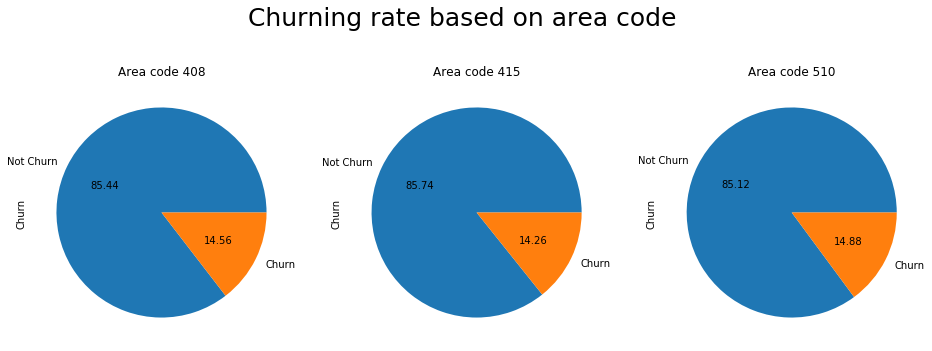

In [20]:
plt.figure(figsize=(16,6))
plt.suptitle('Churning rate based on area code',fontsize=25)
plt.subplot(131)
plt.title('Area code 408')
full[full['Area_code']==408]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(132)
plt.title('Area code 415')
full[full['Area_code']==415]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(133)
plt.title('Area code 510')
full[full['Area_code']==510]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.show()

Each area code has the same proprtion of churning and non churning customer, will not have much effect with prediction

In [21]:
train = train.drop(columns=['Area_code'])
test = test.drop(columns=['Area_code'])
full = full.drop(columns=['Area_code'])

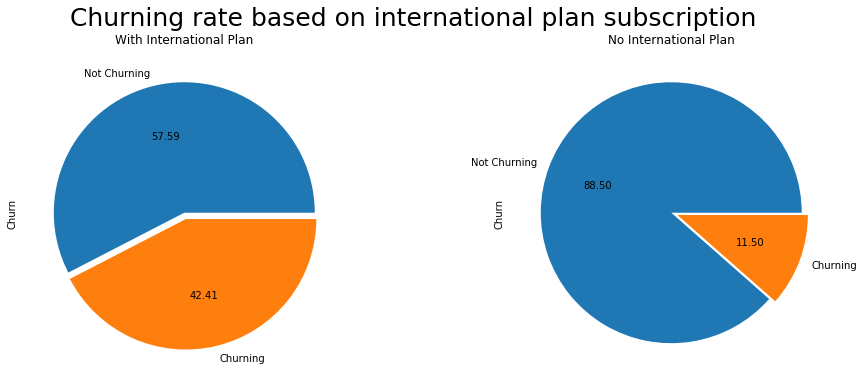

In [22]:
plt.figure(figsize=(16,6))
plt.suptitle('Churning rate based on international plan subscription',fontsize=25)
plt.subplot(121)
plt.title('With International Plan',fontsize=12)
full[full['Intl_plan']=='Yes']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(122)
plt.title('No International Plan',fontsize=12)
full[full['Intl_plan']=='No']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.show()

Having an international plan subscription affect customer churning greatly.

### Visualize top telecom member

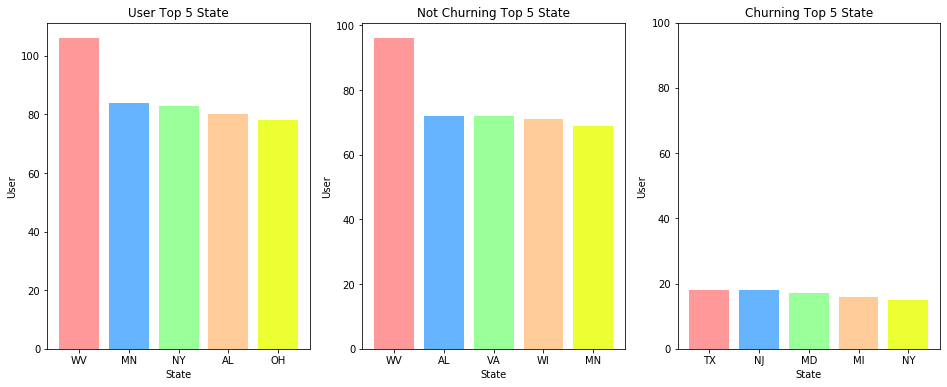

In [33]:
state_top = dict(full['State'].value_counts().head())
state_no_top = dict(full[full['Churn']==0]['State'].value_counts().head())
state_yes_top = dict(full[full['Churn']==1]['State'].value_counts().head())

plt.figure(figsize=(16,6))
plt.subplot(131)
plt.title('User Top 5 State')
plt.bar(state_top.keys(),state_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')

plt.subplot(132)
plt.title('Not Churning Top 5 State')
plt.bar(state_no_top.keys(),state_no_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')

plt.subplot(133)
plt.title('Churning Top 5 State')
plt.bar(state_yes_top.keys(),state_yes_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.ylim(0,100)

plt.show()

### Top 5 churning state

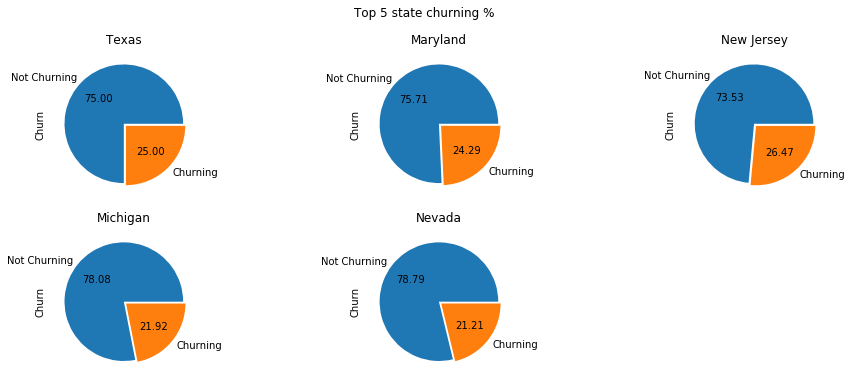

In [34]:
plt.figure(figsize=(16,6))
plt.suptitle('Top 5 state churning %')
plt.subplot(231)
plt.title('Texas')
full[full['State']=='TX']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(232)
plt.title('Maryland')
full[full['State']=='MD']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(233)
plt.title('New Jersey')
full[full['State']=='NJ']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(234)
plt.title('Michigan')
full[full['State']=='MI']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(235)
plt.title('Nevada')
full[full['State']=='NV']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.show()

Top 5 churning state has a high churn ratio in comparison with the average. 

Customer's location might affect churning rate (?)

### Average day charge per state

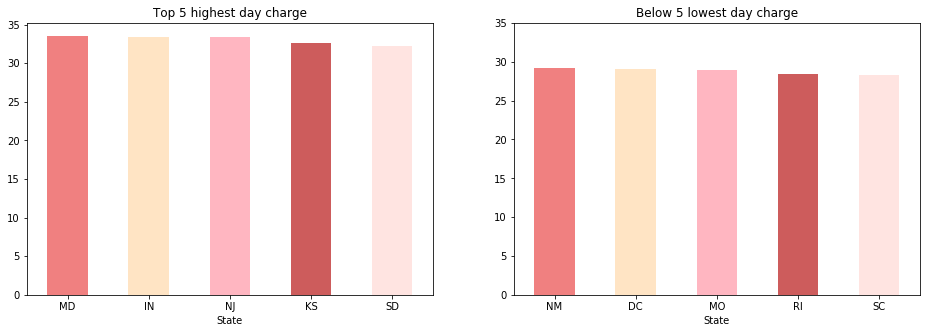

In [37]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest day charge')
full.groupby('State')['day_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))

plt.subplot(122)
plt.title('Below 5 lowest day charge')
full.groupby('State')['day_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))
plt.show()

### Maryland(MD) and New Jersey (NJ) is in top 5 in churning and highest day charge.

Higher day charge = higher churn?

### Average evening charge per state

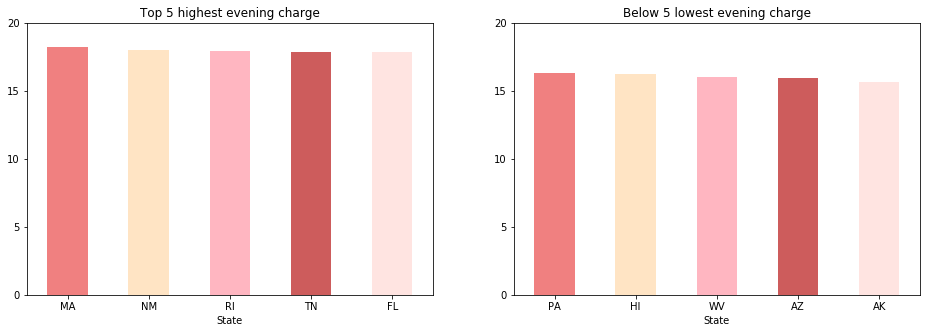

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest evening charge')
full.groupby('State')['eve_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))

plt.subplot(122)
plt.title('Below 5 lowest evening charge')
full.groupby('State')['eve_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))
plt.show()

### Average night charge per state

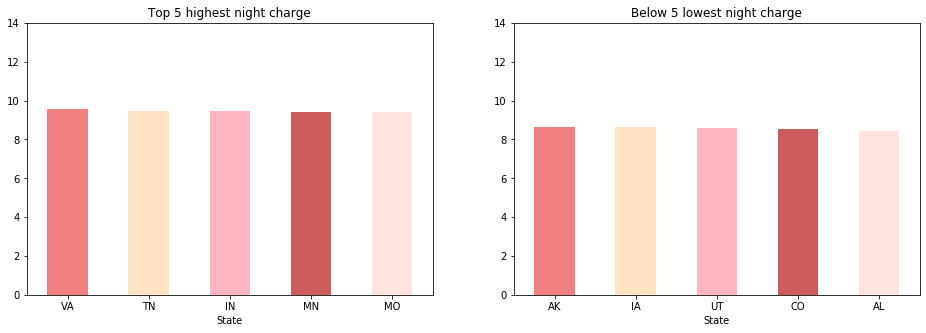

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest night charge')
full.groupby('State')['night_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))

plt.subplot(122)
plt.title('Below 5 lowest night charge')
full.groupby('State')['night_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))
plt.show()

### None of states in top 5 highest night and evening charge is in top 5 in churning.

Night & Evening charge != churn?

### Average international charge based on state

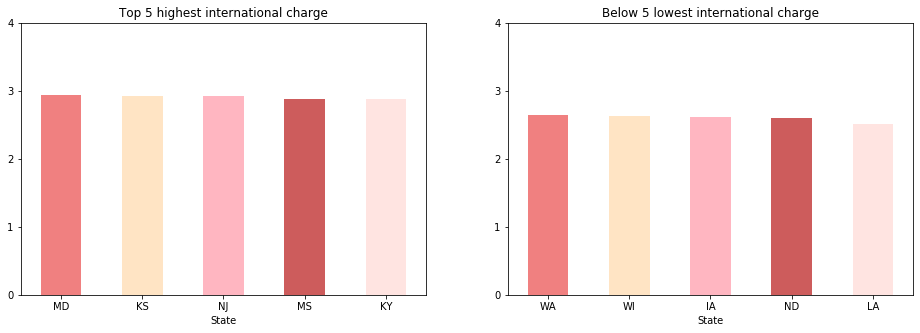

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest international charge')
full.groupby('State')['intl_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))

plt.subplot(122)
plt.title('Below 5 lowest international charge')
full.groupby('State')['intl_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))
plt.show()

### Again, Maryland and New Jersey is in top 5 in highest international charge and top 5 churn.

Does international charge affected churning more?

In [41]:
full.describe()

Account_length  Voicemail_message   day_minute     day_call  \
count     3333.000000        3333.000000  3333.000000  3333.000000   
mean       101.064806           8.099010   179.775098   100.435644   
std         39.822106          13.688365    54.467389    20.069084   
min          1.000000           0.000000     0.000000     0.000000   
25%         74.000000           0.000000   143.700000    87.000000   
50%        101.000000           0.000000   179.400000   101.000000   
75%        127.000000          20.000000   216.400000   114.000000   
max        243.000000          51.000000   350.800000   165.000000   

        day_charge   eve_minute     eve_call   eve_charge  night_minute  \
count  3333.000000  3333.000000  3333.000000  3333.000000   3333.000000   
mean     30.562307   200.980348   100.114311    17.083540    200.872037   
std       9.259435    50.713844    19.922625     4.310668     50.573847   
min       0.000000     0.000000     0.000000     0.000000     23.200000   
25%      24.430000   166.600000    87.000000    14.160000    167.000000   
50%      30.500000   201.400000   100.000000    17.120000    201.200000   
75%      36.790000   235.300000   114.000000    20.000000    235.300000   
max      59.640000   363.700000   170.000000    30.910000    395.000000   

        night_call  night_charge  intl_minute    intl_call  intl_charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

          CS_calls        Churn  
count  3333.000000  3333.000000  
mean      1.562856     0.144914  
std       1.315491     0.352067  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       2.000000     0.000000  
max       9.000000     1.000000

### Check numerical feature data

#### Check numerical feature correlation with target

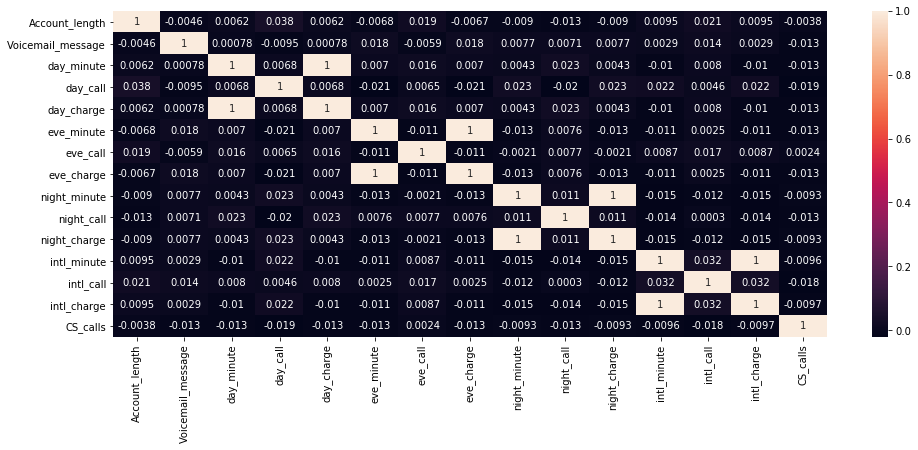

In [42]:
plt.figure(figsize=(16,6))
sb.heatmap(full[num].corr(),annot=True)
plt.show()

#### There are several features that are highly correlated with each other

- day_minute and day_charge -> 6am - 5pm
- eve_minute and eve_charge -> 5pm - 8pm
- night_minute and night_charge -> 8pm - 6am
- intl_minute and intl_charge

#### Highly correlated feature will be drop

Feature to be dropped:
- day_minute
- eve_minute
- night_minute
- intl_minute

Reasoning: consumer likely to stop subscription based on price charged, not by how much minute they use the service

In [43]:
train = train.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])
test = test.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])

In [44]:
full = full.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])

In [45]:
full.head()

State  Account_length Intl_plan Voicemail_plan  Voicemail_message  day_call  \
0    KS             128        No            Yes                 25       110   
1    OH             107        No            Yes                 26       123   
2    NJ             137        No             No                  0       114   
3    OH              84       Yes             No                  0        71   
4    OK              75       Yes             No                  0       113   

   day_charge  eve_call  eve_charge  night_call  night_charge  intl_call  \
0       45.07        99       16.78          91         11.01          3   
1       27.47       103       16.62         103         11.45          3   
2       41.38       110       10.30         104          7.32          5   
3       50.90        88        5.26          89          8.86          7   
4       28.34       122       12.61         121          8.41          3   

   intl_charge  CS_calls  Churn  
0         2.70         1      0  
1         3.70         1      0  
2         3.29         0      0  
3         1.78         2      0  
4         2.73         3      0

In [49]:
newnum = [i for i in full.columns if i not in cat]
newcat = ['State','Intl_plan']

#### Heatmap after dropping highly correlated features

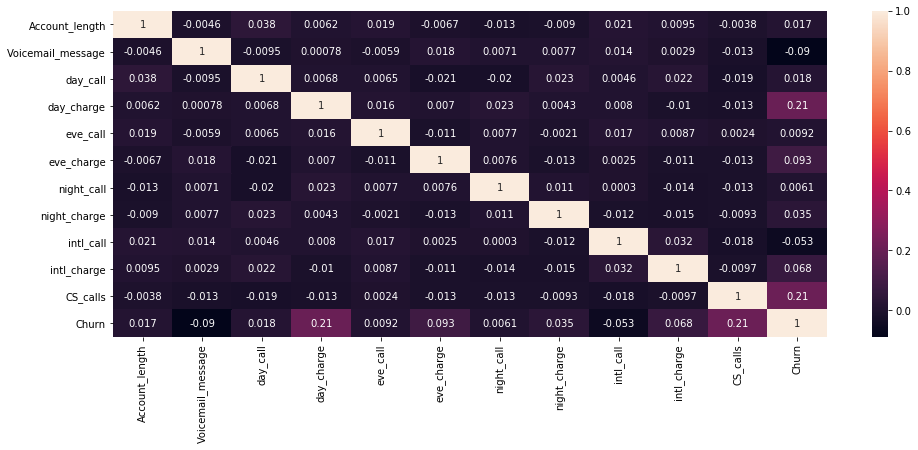

In [50]:
plt.figure(figsize=(16,6))
sb.heatmap(full[newnum].corr(),annot=True)
plt.show()

#### Visualize highest correlated feature with target

##### Day charge

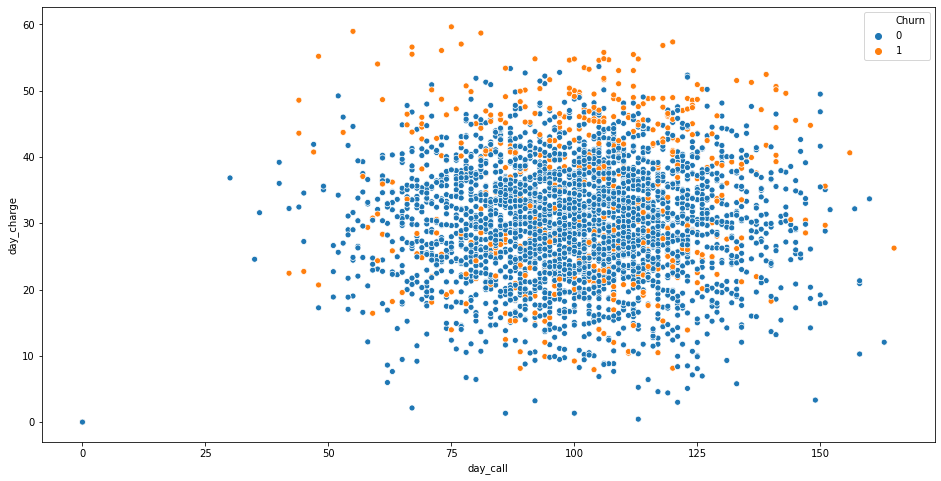

In [51]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='day_call',y='day_charge',hue='Churn',data=full)
plt.show()

<BarContainer object of 2 artists>

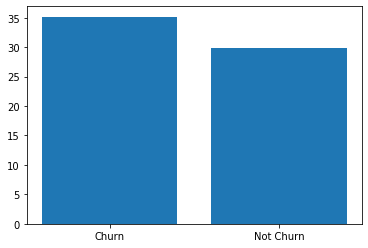

In [52]:
plt.bar(['Churn','Not Churn'],[full[full['Churn']==1]['day_charge'].mean(),full[full['Churn']==0]['day_charge'].mean()])

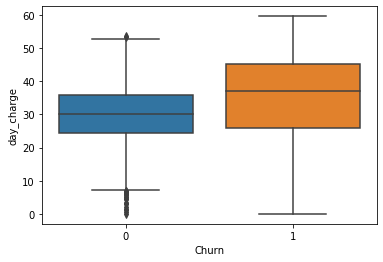

In [53]:
sb.boxplot(x='Churn',y='day_charge',data=full)

#### On average, customers who churn charged more on day calls although they spend the same amount of calls as those who not churn.

Possible churning because of overcharging?

#### See customer service call made effect on churning

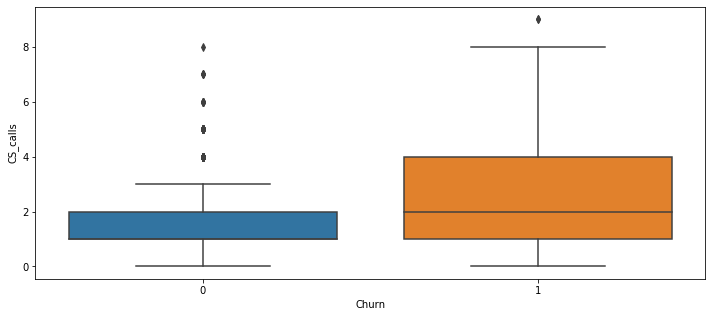

In [54]:
plt.figure(figsize=(12,5))
sb.boxplot(x='Churn',y='CS_calls',data=full)
plt.show()

##### Customer with more customer service calls per month tend to churn

#### Create dummy variables for categorical feature

#### Dummy variable for state

In [55]:
state_dummy_train = pd.get_dummies(train['State'],prefix='state')
state_dummy_test = pd.get_dummies(test['State'],prefix='state')
state_dummy_full = pd.get_dummies(full['State'],prefix='state')

#### Dummy variable for international plan

In [56]:
intl_dummy_train = pd.get_dummies(train['Intl_plan'],prefix='intl')
intl_dummy_test = pd.get_dummies(test['Intl_plan'],prefix='intl')
intl_dummy_full = pd.get_dummies(full['Intl_plan'],prefix='intl')

### Concat dummies variable with other feature

In [57]:
new_train = pd.concat([state_dummy_train,intl_dummy_train,train[newnum]],axis=1)
new_train.head()

state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  ...  day_call  day_charge  eve_call  \
0         0         0         0  ...       110       45.07        99   
1         0         0         0  ...       123       27.47       103   
2         0         0         0  ...       114       41.38       110   
3         0         0         0  ...        71       50.90        88   
4         0         0         0  ...       113       28.34       122   

   eve_charge  night_call  night_charge  intl_call  intl_charge  CS_calls  \
0       16.78          91         11.01          3         2.70         1   
1       16.62         103         11.45          3         3.70         1   
2       10.30         104          7.32          5         3.29         0   
3        5.26          89          8.86          7         1.78         2   
4       12.61         121          8.41          3         2.73         3   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 65 columns]

In [58]:
new_test = pd.concat([state_dummy_test,intl_dummy_test,test[newnum]],axis=1)
new_test.head()

state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  ...  day_call  day_charge  eve_call  \
0         0         0         0  ...        97       31.37        80   
1         0         0         0  ...       137       21.95        83   
2         0         0         0  ...        67       56.59        97   
3         0         0         0  ...       103       18.77       102   
4         0         0         0  ...       117       20.28       109   

   eve_charge  night_call  night_charge  intl_call  intl_charge  CS_calls  \
0       29.89          90          9.71          4         2.35         1   
1       19.42         111          9.40          6         3.43         4   
2       27.01         128          7.23          9         1.46         4   
3       11.67         105          8.53          6         2.08         2   
4       18.28          90          8.04          1         3.00         1   

   Churn  
0      0  
1      1  
2      1  
3      0  
4      0  

[5 rows x 65 columns]

### Concat data for full dataset

In [59]:
new_full = pd.concat([state_dummy_full,intl_dummy_full,full[newnum]],axis=1)
new_full.head()

state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  ...  day_call  day_charge  eve_call  \
0         0         0         0  ...       110       45.07        99   
1         0         0         0  ...       123       27.47       103   
2         0         0         0  ...       114       41.38       110   
3         0         0         0  ...        71       50.90        88   
4         0         0         0  ...       113       28.34       122   

   eve_charge  night_call  night_charge  intl_call  intl_charge  CS_calls  \
0       16.78          91         11.01          3         2.70         1   
1       16.62         103         11.45          3         3.70         1   
2       10.30         104          7.32          5         3.29         0   
3        5.26          89          8.86          7         1.78         2   
4       12.61         121          8.41          3         2.73         3   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 65 columns]

### Export cleaned data to csv

In [60]:
new_train.to_csv('clean_train.csv',index=False)
new_test.to_csv('clean_test.csv',index=False)
new_full.to_csv('clean_full.csv',index=False)
full.to_csv('full.csv',index=False)